In [29]:
# Dataset from Kaggle
# https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

# The purpose of the project is to train a model which, give a job post, classify if it's a real or fraudulent job
# Dataset table columns description:
#job_id                 Unique Job ID
#title                  The title of the job entry.
#location               Geographical location of the job
#department             Corporate department 
#salary_range           Indicative salary range
#company_profile        Company description
#description            Description of the job
#requirements           Requirements for the job position
#benefits               Benefits offered
#telecommuting          Telecommuting positions Bool
#has_company_logo       Company logo Bool
#has_questions          Questions Bool
#employment_type        Full-type, Part-time, Contract, etc.
#required_experience    Executive, Entry level, Intern, etc.
#required_education     Doctorate, Master’s Degree, Bachelor, etc.
#industry               Automotive, IT, Health care, Real estate, etc
#function               Consulting, Engineering, Research, Sales etc.
#fraudulent             Target variable Bool

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df = pd.read_csv('fake_job_postings.csv')

In [211]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<h2>EDA</h2>

In [212]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [213]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

Columns Format is ok.

In [214]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [215]:
df.duplicated().sum()

0

There are a lot of null values.
I want to replace this null values with 'not_available' string. If an information is available or not could be useful to determinate if is a fake job or not.
I want also remove the job_id column, because I think it's not relevant.

In [216]:
df = df.drop(['job_id'], axis = 'columns')

In [217]:
df['location_available'] = np.where(df['location'].isnull(), 'not_available', 'available')

In [218]:
df['department_available'] = np.where(df['department'].isnull(), 'not_available', 'available')

In [219]:
df['salary_range_available'] = np.where(df['salary_range'].isnull(), 'not_available', 'available')

In [220]:
df['company_profile_available'] = np.where(df['company_profile'].isnull(), 'not_available', 'available')
df['company_profile_lenght'] = (np.where(df['company_profile'].isnull(), 0, df['company_profile'].str.len())).astype('int64')

In [221]:
df['description_available'] = np.where(df['description'].isnull(), 'not_available', 'available')
df['description_lenght'] = (np.where(df['description'].isnull(), 0, df['description'].str.len())).astype('int64')

In [222]:
df['requirements_available'] = np.where(df['requirements'].isnull(), 'not_available', 'available')
df['requirements_lenght'] = (np.where(df['requirements'].isnull(), 0, df['requirements'].str.len())).astype('int64')

In [223]:
df['benefits_available'] = np.where(df['benefits'].isnull(), 'not_available', 'available')
df['benefits_lenght'] = (np.where(df['benefits'].isnull(), 0, df['benefits'].str.len())).astype('int64')

For the fields above, I don't need the content, but I would like to consider if the information is present or not and for the field where there is a lot of text I would consider the lenght of the text and not the content. You can use word in many way and express same concept in many way.

I do the same thing with title field, text field, you can play with the text and describe the same job with different words.

In [224]:
df['title'].value_counts()

English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

graduates:_english_teacher_abroad_(conversational) is a mix of english teacher and education?

In [225]:
df['department'].value_counts()

Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: department, Length: 1337, dtype: int64

Departments: same idea of the previous, see marcomm (is marketing? a mix of commercial management?), and 11547 data not available. In order to check if is a fake job or not, I think is more useful know if an information is present or not

In [226]:
df['title_lenght'] = (np.where(df['title'].isnull(), 0, df['title'].str.len())).astype('int64')
df = df.drop(['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits'], axis = 'columns')

In [227]:
df.isnull().sum()

telecommuting                   0
has_company_logo                0
has_questions                   0
employment_type              3471
required_experience          7050
required_education           8105
industry                     4903
function                     6455
fraudulent                      0
location_available              0
department_available            0
salary_range_available          0
company_profile_available       0
company_profile_lenght          0
description_available           0
description_lenght              0
requirements_available          0
requirements_lenght             0
benefits_available              0
benefits_lenght                 0
title_lenght                    0
dtype: int64

In [228]:
df['employment_type'].value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [229]:
df['employment_type'].fillna("not_available",inplace=True)

In [230]:
df['employment_type'].value_counts()

Full-time        11620
not_available     3471
Contract          1524
Part-time          797
Temporary          241
Other              227
Name: employment_type, dtype: int64

employment_type: useful, I would replace the null values with not_available

In [231]:
df['required_experience'].value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [232]:
df['required_experience'].fillna("not_available",inplace=True)

In [233]:
df['required_experience'].value_counts()

not_available       7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

required_experience: same as before. There are a lot of not_available info but also a good amount of information

In [234]:
df['required_education'].value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [235]:
df['required_education'].fillna("not_available",inplace=True)

In [236]:
df['required_education'].value_counts()

not_available                        8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

required_education: same as before

In [237]:
df['industry'].value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

In [238]:
df['industry'].fillna("not_available",inplace=True)

In [239]:
df['industry'].value_counts()

not_available                          4903
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 132, dtype: int64

industry: same as before

In [240]:
df['function'].value_counts()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

In [241]:
df['function'].fillna("not_available",inplace=True)

In [242]:
df['function'].value_counts()

not_available             6455
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training

function: same as before

In [269]:
df['telecommuting'].value_counts()

0    17113
1      767
Name: telecommuting, dtype: int64

In [270]:
df['has_company_logo'].value_counts()

1    14220
0     3660
Name: has_company_logo, dtype: int64

In [271]:
df['has_questions'].value_counts()

0    9088
1    8792
Name: has_questions, dtype: int64

In [272]:
df['employment_type'].value_counts()

full-time        11620
not_available     3471
contract          1524
part-time          797
temporary          241
other              227
Name: employment_type, dtype: int64

Clean string fields with lower case chars and replace the space with _ 

In [273]:
cols = list(df.dtypes[df.dtypes == 'object'].index)

for c in cols:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [274]:
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,title_lenght,...,department_available,salary_range_available,company_profile_available,company_profile_lenght,description_available,description_lenght,requirements_available,requirements_lenght,benefits_available,benefits_lenght
0,0,1,0,other,internship,not_available,not_available,marketing,0,16,...,available,not_available,available,885,available,905,available,852,not_available,0
1,0,1,0,full-time,not_applicable,not_available,marketing_and_advertising,customer_service,0,41,...,available,not_available,available,1286,available,2077,available,1433,available,1292
2,0,1,0,not_available,not_available,not_available,not_available,not_available,0,39,...,not_available,not_available,available,879,available,355,available,1363,not_available,0
3,0,1,0,full-time,mid-senior_level,bachelor's_degree,computer_software,sales,0,33,...,available,not_available,available,614,available,2600,available,1429,available,782
4,0,1,1,full-time,mid-senior_level,bachelor's_degree,hospital_&_health_care,health_care_provider,0,19,...,not_available,not_available,available,1628,available,1520,available,757,available,21


In [275]:
df.isnull().sum()

telecommuting                0
has_company_logo             0
has_questions                0
employment_type              0
required_experience          0
required_education           0
industry                     0
function                     0
fraudulent                   0
title_lenght                 0
location_available           0
department_available         0
salary_range_available       0
company_profile_available    0
company_profile_lenght       0
description_available        0
description_lenght           0
requirements_available       0
requirements_lenght          0
benefits_available           0
benefits_lenght              0
dtype: int64

In [276]:
df.nunique()

telecommuting                   2
has_company_logo                2
has_questions                   2
employment_type                 6
required_experience             8
required_education             14
industry                      132
function                       38
fraudulent                      2
title_lenght                  100
location_available              2
department_available            2
salary_range_available          2
company_profile_available       2
company_profile_lenght       1014
description_available           2
description_lenght           3310
requirements_available          2
requirements_lenght          2193
benefits_available              2
benefits_lenght              1227
dtype: int64

In [278]:
df.dtypes

telecommuting                 int64
has_company_logo              int64
has_questions                 int64
employment_type              object
required_experience          object
required_education           object
industry                     object
function                     object
fraudulent                    int64
title_lenght                  int64
location_available           object
department_available         object
salary_range_available       object
company_profile_available    object
company_profile_lenght        int64
description_available        object
description_lenght            int64
requirements_available       object
requirements_lenght           int64
benefits_available           object
benefits_lenght               int64
dtype: object

In [280]:
#numerical = ['telecommuting', 'has_company_logo', 'has_questions']
#categorical = ['title', 'location', 'department', 'salary_range', 'company_profile',
               #'description', 'requirements', 'benefits', 'employment_type', 'required_experience',
               #'required_education', 'industry', 'function']             
#target = ['fraudulent']

numerical = ['telecommuting', 'has_company_logo', 'has_questions', 'company_profile_lenght', 'description_lenght',
            'requirements_lenght', 'benefits_lenght', 'title_lenght']
categorical = ['location_available', 'department_available', 'salary_range_available', 'company_profile_available',
               'description_available', 'requirements_available', 'benefits_available', 'employment_type',
               'required_experience', 'required_education', 'industry', 'function']         
target = ['fraudulent']

In [281]:
df.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

<AxesSubplot:xlabel='fraudulent', ylabel='Count'>

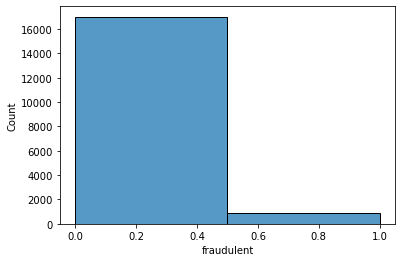

In [282]:
sns.histplot(df.fraudulent, bins=2)

<h3>Features Importance Correlation - Numerical Features</h3>

Text(0.5, 1.0, 'Variable Correlation')

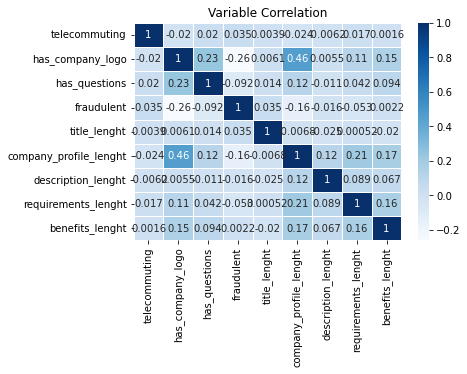

In [283]:
ax = sns.heatmap(df.corr(),annot=True, linewidths=.5, cmap=plt.cm.Blues)
plt.title('Variable Correlation')

In [284]:
df[numerical].corrwith(df['fraudulent'])

telecommuting             0.034523
has_company_logo         -0.261971
has_questions            -0.091627
company_profile_lenght   -0.155065
description_lenght       -0.015927
requirements_lenght      -0.053013
benefits_lenght           0.002209
title_lenght              0.034741
dtype: float64

<h3>Mutual Information - Categorical Features</h3>

In [285]:
from sklearn.metrics import mutual_info_score

def mutual_info_fraudulent_score(series):
    return mutual_info_score(df['fraudulent'], series)

mi = df[categorical].apply(mutual_info_fraudulent_score)
mi.sort_values(ascending=False)

industry                     0.031548
company_profile_available    0.030207
function                     0.013993
required_education           0.008147
required_experience          0.003952
employment_type              0.002678
salary_range_available       0.001571
description_available        0.000169
requirements_available       0.000140
department_available         0.000117
benefits_available           0.000031
location_available           0.000009
dtype: float64

<h2>Dataset Preparation</h2>

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [287]:
numerical = ['telecommuting', 'has_company_logo', 'has_questions', 'company_profile_lenght', 'description_lenght',
            'requirements_lenght', 'benefits_lenght', 'title_lenght']
categorical = ['location_available', 'department_available', 'salary_range_available', 'company_profile_available',
               'description_available', 'requirements_available', 'benefits_available', 'employment_type',
               'required_experience', 'required_education', 'industry', 'function']         
target = ['fraudulent']

In [288]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [289]:
df_train.shape

(10728, 21)

In [290]:
df_val.shape

(3576, 21)

In [291]:
df_test.shape

(3576, 21)

In [292]:
df_full_train.shape

(14304, 21)

In [293]:
df_train = df_train.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fraudulent.values
y_full_train = df_full_train.fraudulent.values
y_val = df_val.fraudulent.values
y_test = df_test.fraudulent.values

del df_train['fraudulent']
del df_val['fraudulent']
#del df_full_train['fraudulent']
del df_test['fraudulent']

<h3>One-Hot Encoding</h3>

In [294]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
full_train_dicts = df_full_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
test_dicts = df_test[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_full_train = dv.transform(full_train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [295]:
X_train

array([[  0.,   1.,   0., ...,   1.,   0.,  17.],
       [  0.,   1.,   0., ...,   1.,   0.,  17.],
       [  1.,   0.,  19., ...,   1.,   0.,  41.],
       ...,
       [  1.,   0., 525., ...,   1.,   0.,  31.],
       [  1.,   0., 130., ...,   1.,   1.,  23.],
       [  0.,   1.,   0., ...,   1.,   0.,  13.]])

<h2>First test with LogisticRegression Model</h2>

In [296]:
from sklearn.linear_model import LogisticRegression

In [297]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [298]:
y_pred = model.predict_proba(X_val)[:, 1]
isFraudulent = (y_pred >= 0.5)
accuracy = (y_val == isFraudulent).mean()
accuracy

0.9546979865771812

<h3>Check Accuracy Threshold</h3>

In [299]:
from sklearn.metrics import accuracy_score

In [300]:
thresholds = np.linspace(0, 1 , 21)

In [301]:
scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.052
0.05 0.824
0.10 0.881
0.15 0.912
0.20 0.930
0.25 0.937
0.30 0.947
0.35 0.949
0.40 0.952
0.45 0.953
0.50 0.955
0.55 0.955
0.60 0.953
0.65 0.952
0.70 0.951
0.75 0.951
0.80 0.949
0.85 0.948
0.90 0.948
0.95 0.948
1.00 0.948


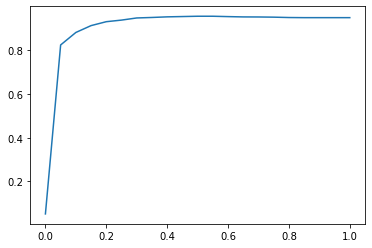

In [302]:
plt.plot(thresholds, scores)

<h3>Confusion Table</h3>

In [303]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [304]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [305]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [306]:
confusion_matrix = np.array([
    [tn, fp], 
    [fn, tp]
])

(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.95, 0.  ],
       [0.04, 0.01]])

In [307]:
(tp + tn) / (tp + tn + fp + fn)

0.9546979865771812

<h3>Precision and Recall</h3>

In [308]:
p = tp / (tp + fp)
p

0.7804878048780488

In [309]:
r = tp / (tp + fn)
r

0.17297297297297298

<h3>Ideal Prediction VS ROC AUC</h3>

In [310]:
t = 0.5

In [311]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
    
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    return df_scores

In [312]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(3391, 185)

In [313]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [314]:
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 2.79720280e-04, 5.59440559e-04, ...,
       9.99440559e-01, 9.99720280e-01, 1.00000000e+00])

In [315]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
#df_ideal[::10]
df_ideal

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,185,3391,0,0,1.000000,1.000000
1,0.05,185,3212,0,179,1.000000,0.947213
2,0.10,185,3033,0,358,1.000000,0.894426
3,0.15,185,2854,0,537,1.000000,0.841640
4,0.20,185,2676,0,715,1.000000,0.789148
5,0.25,185,2497,0,894,1.000000,0.736361
6,0.30,185,2318,0,1073,1.000000,0.683574
7,0.35,185,2139,0,1252,1.000000,0.630787
8,0.40,185,1961,0,1430,1.000000,0.578295
9,0.45,185,1782,0,1609,1.000000,0.525509


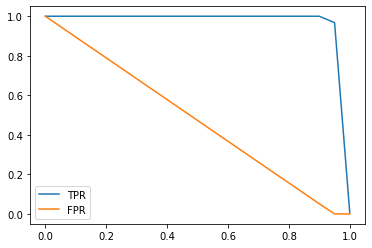

In [316]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

In [317]:
((y_ideal_pred > 0.949) == y_ideal).mean()

0.9994407158836689

In [318]:
from sklearn.metrics import roc_curve

In [319]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

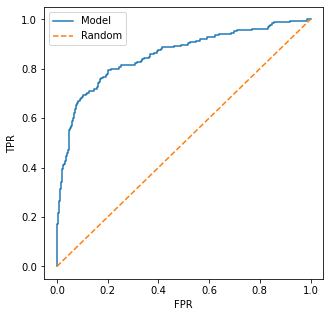

In [320]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

<h3>ROC AUC of The LogisticRegression Model</h3>

In [321]:
from sklearn.metrics import roc_auc_score

In [322]:
auc = roc_auc_score(y_val, y_pred)
auc

0.8541544788669532

<h3>Some Test with LogisticRegression Model</h3>

In [323]:
job = val_dicts[51]
job

{'location_available': 'available',
 'department_available': 'available',
 'salary_range_available': 'not_available',
 'company_profile_available': 'available',
 'description_available': 'available',
 'requirements_available': 'available',
 'benefits_available': 'available',
 'employment_type': 'full-time',
 'required_experience': 'mid-senior_level',
 'required_education': "bachelor's_degree",
 'industry': 'telecommunications',
 'function': 'product_management',
 'telecommuting': 0,
 'has_company_logo': 1,
 'has_questions': 0,
 'company_profile_lenght': 2676,
 'description_lenght': 5652,
 'requirements_lenght': 2290,
 'benefits_lenght': 225,
 'title_lenght': 32}

In [324]:
X_small = dv.transform([job])
model.predict_proba(X_small)[0, 1].round(3)

0.004

In [325]:
y_val[51]

0

In [326]:
job1 = val_dicts[32]
job1

{'location_available': 'available',
 'department_available': 'not_available',
 'salary_range_available': 'available',
 'company_profile_available': 'not_available',
 'description_available': 'available',
 'requirements_available': 'available',
 'benefits_available': 'available',
 'employment_type': 'full-time',
 'required_experience': 'entry_level',
 'required_education': 'high_school_or_equivalent',
 'industry': 'telecommunications',
 'function': 'customer_service',
 'telecommuting': 0,
 'has_company_logo': 0,
 'has_questions': 0,
 'company_profile_lenght': 0,
 'description_lenght': 564,
 'requirements_lenght': 202,
 'benefits_lenght': 153,
 'title_lenght': 26}

In [327]:
X_small = dv.transform([job1])
model.predict_proba(X_small)[0, 1].round(3)

0.708

In [328]:
y_val[32]

1

In [329]:
# np.where(y_val == 1)

<h3>Kfold Cross Validation Model</h3>

In [334]:
#!pip install tqdm

In [335]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [336]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [337]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [338]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [339]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [340]:
df_trainK = df_full_train.iloc[train_idx]
df_valK = df_full_train.iloc[val_idx]

In [341]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.fraudulent.values
        y_val = df_val.fraudulent.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.788 +- 0.020


/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


C=0.01 0.852 +- 0.018


/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

C=0.1 0.889 +- 0.013


/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

C=0.5 0.894 +- 0.013


/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

C=1 0.893 +- 0.013


/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

C=5 0.895 +- 0.013


/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

C=10 0.891 +- 0.011


In [346]:
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.fraudulent.values
    y_val = df_val.fraudulent.values

    dv, model = train(df_train, y_train, C=0.5)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    
print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))



/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/germano/anaconda3/envs/ml-zoomcamp_3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

C=10 0.894 +- 0.013


<h2>Clean and definition of utility scripts</h2>

In [12]:
def dataset_loading(file):
    df = pd.read_csv(file)
    return df

In [13]:
def dataset_cleaning(df):
    df = df.drop(['job_id'], axis = 'columns')
    
    df['title_lenght'] = (np.where(df['title'].isnull(), 0, df['title'].str.len())).astype('int64')
    df['location_available'] = np.where(df['location'].isnull(), 'not_available', 'available')
    df['department_available'] = np.where(df['department'].isnull(), 'not_available', 'available')
    df['salary_range_available'] = np.where(df['salary_range'].isnull(), 'not_available', 'available')
    df['company_profile_available'] = np.where(df['company_profile'].isnull(), 'not_available', 'available')
    df['company_profile_lenght'] = (np.where(df['company_profile'].isnull(), 0, df['company_profile'].str.len())).astype('int64')
    df['description_available'] = np.where(df['description'].isnull(), 'not_available', 'available')
    df['description_lenght'] = (np.where(df['description'].isnull(), 0, df['description'].str.len())).astype('int64')
    df['requirements_available'] = np.where(df['requirements'].isnull(), 'not_available', 'available')
    df['requirements_lenght'] = (np.where(df['requirements'].isnull(), 0, df['requirements'].str.len())).astype('int64')
    df['benefits_available'] = np.where(df['benefits'].isnull(), 'not_available', 'available')
    df['benefits_lenght'] = (np.where(df['benefits'].isnull(), 0, df['benefits'].str.len())).astype('int64')
    df = df.drop(['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits'], axis = 'columns')

    df.fillna("not_available",inplace=True)

    cols = list(df.dtypes[df.dtypes == 'object'].index)
    for c in cols:
        df[c] = df[c].str.lower().str.replace(' ', '_')
    
    return df

In [14]:
def confusionMap(y_val):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    t = 0.5
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    confusion_matrix = np.array([
        [tn, fp], 
        [fn, tp]
    ])

    print((confusion_matrix / confusion_matrix.sum()).round(2))

In [15]:
def Precision_Recall(y_val):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    t = 0.5
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    p = tp / (tp + fp)
    print('Precision: %.3f' % p)

    r = tp / (tp + fn)
    print('Recall: %.3f' % r)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [17]:
df = dataset_loading('fake_job_postings.csv')

df = dataset_cleaning(df)

numerical = ['telecommuting', 'has_company_logo', 'has_questions', 'company_profile_lenght', 'description_lenght',
            'requirements_lenght', 'benefits_lenght', 'title_lenght']
categorical = ['location_available', 'department_available', 'salary_range_available', 'company_profile_available',
               'description_available', 'requirements_available', 'benefits_available', 'employment_type',
               'required_experience', 'required_education', 'industry', 'function']         
target = ['fraudulent']

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
df_train = df_train.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fraudulent.values
y_full_train = df_full_train.fraudulent.values
y_val = df_val.fraudulent.values
y_test = df_test.fraudulent.values

del df_train['fraudulent']
del df_val['fraudulent']
del df_full_train['fraudulent']
del df_test['fraudulent']

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
full_train_dicts = df_full_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
test_dicts = df_test[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_full_train = dv.transform(full_train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

<h3>Test Decision Tree Classifier</h3>

Tuning parameters

In [376]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [377]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [378]:
roc_auc_score(y_val, y_pred)

0.820145536276471

In [372]:
confusionMap(y_val)

[[0.93 0.02]
 [0.02 0.03]]


In [373]:
Precision_Recall(y_val)

Precision: 0.646
Recall: 0.659


In [33]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.761
   2 -> 0.807
   3 -> 0.843
   4 -> 0.864
   5 -> 0.872
   6 -> 0.872
  10 -> 0.862
  15 -> 0.822
  20 -> 0.846
None -> 0.821


In [34]:
scores = []
d = 6
for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
    dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((d, s, auc))
    print('(%4s, %3d) -> %.3f' % (d, s, auc))

(   6,   1) -> 0.883
(   6,   2) -> 0.876
(   6,   5) -> 0.884
(   6,  10) -> 0.911
(   6,  15) -> 0.911
(   6,  20) -> 0.907
(   6, 100) -> 0.908
(   6, 200) -> 0.885
(   6, 500) -> 0.856


In [35]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10)
dt.fit(X_train, y_train)
    
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.9108976862441919

In [36]:
confusionMap(y_val)

[[0.94 0.  ]
 [0.03 0.02]]


In [37]:
Precision_Recall(y_val)

Precision: 0.824
Recall: 0.330


<h3>Test Random Forest Model</h3>

Tuning rounds, max_depth, min_samples_leaf

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [40]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [41]:
roc_auc_score(y_val, y_pred)

0.939314720205313

In [42]:
confusionMap(y_val)

[[0.94 0.01]
 [0.02 0.03]]


In [43]:
Precision_Recall(y_val)

Precision: 0.859
Recall: 0.627


In [44]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))
    #print('%4s -> %.3f' % (n, auc))

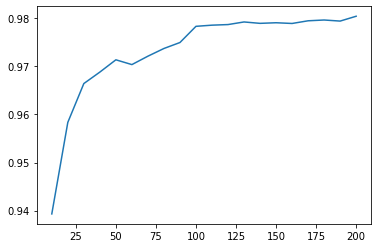

In [45]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)


In [46]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])
df_scores.head()


,max_depth,n_estimators,auc
0,5,10,0.902770
1,5,20,0.909902
2,5,30,0.912716
3,5,40,0.913854
4,5,50,0.918964


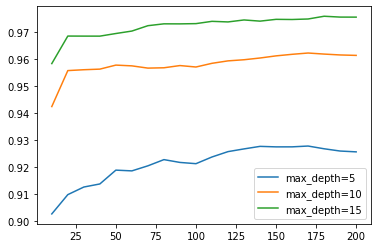

In [47]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)
    
plt.legend()

In [48]:
max_depth=15

In [49]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth, 
                                    min_samples_leaf=s, 
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.958376
1,1,20,0.968558
2,1,30,0.968538
3,1,40,0.968530
4,1,50,0.969500


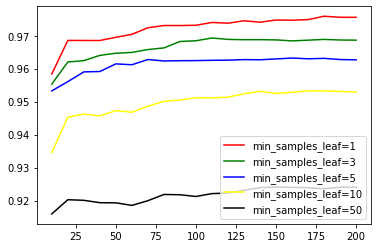

In [50]:
colors = ['red', 'green', 'blue', 'yellow', 'black']
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators,
             df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)
    
plt.legend() 

In [51]:
rf = RandomForestClassifier(n_estimators=170, 
                                    max_depth=15, 
                                    min_samples_leaf=1, 
                                    random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]

In [53]:
roc_auc_score(y_val, y_pred)

0.9748714801501591

In [54]:
confusionMap(y_val)

[[0.95 0.  ]
 [0.03 0.02]]


In [55]:
Precision_Recall(y_val)

Precision: 1.000
Recall: 0.465


<h3>Test XgBoost Model</h3>

Tuning Parameters

In [56]:
import xgboost as xgb

In [57]:
features = dv.get_feature_names_out()

In [58]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [59]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [60]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist, verbose_eval=5)

[11:41:46] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.46699	val-logloss:0.46922
[5]	train-logloss:0.14627	val-logloss:0.15610
[10]	train-logloss:0.08428	val-logloss:0.09911
[15]	train-logloss:0.06600	val-logloss:0.08416
[20]	train-logloss:0.05675	val-logloss:0.07710
[25]	train-logloss:0.05133	val-logloss:0.07362
[30]	train-logloss:0.04804	val-logloss:0.07097
[35]	train-logloss:0.04372	val-logloss:0.06817
[40]	train-logloss:0.04019	val-logloss:0.06664
[45]	train-logloss:0.03735	val-logloss:0.06517
[50]	train-logloss:0.03473	val-logloss:0.06494
[55]	train-logloss:0.03057	val-logloss:0.06361
[60]	train-logloss:0.02770	val-logloss:0.06260
[65]	train-logloss:0.02679	val-logloss:0.06218
[70]	train-logloss:0.02463	val-logloss:0.0

In [61]:
y_pred = model.predict(dval)

In [62]:
auc = roc_auc_score(y_val, y_pred)
auc

0.9815879872795237

In [63]:
confusionMap(y_val)

[[0.95 0.  ]
 [0.02 0.04]]


In [64]:
Precision_Recall(y_val)

Precision: 0.933
Recall: 0.681


In [65]:
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

Tuning Best Eta

In [67]:
scores = {}

In [76]:
%%capture output

xgb_params = {
    'eta': 1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,
                  dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [77]:
# dict_keys(['eta=0.3', 'eta=0.1', 'eta=0.01', 'eta=0.05', 'eta=1'])

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1'])

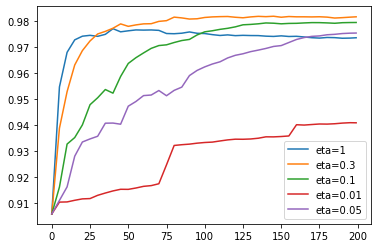

In [78]:
etas = ['eta=1', 'eta=0.3', 'eta=0.1', 'eta=0.01', 'eta=0.05']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

plt.legend()

Best eta = 0.3

Tuning best max_depth

In [79]:
scores = {}

In [86]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,
                  dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [87]:
# dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10'])

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10'])

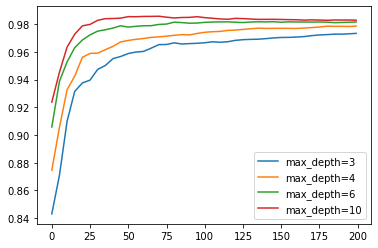

In [88]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.legend()

Best depth = 10

Tuning best min_child_weight

In [89]:
scores = {}

In [94]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 10,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,
                  dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [95]:
# dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

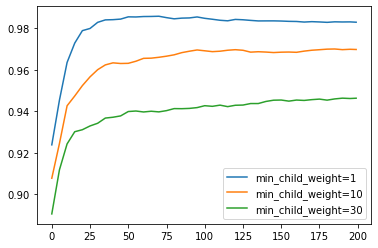

In [96]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.legend()

Best min_child_weight = 1

In [18]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,
                  dtrain,
                  num_boost_round=175)

In [19]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9830337857763396

In [20]:
confusionMap(y_val)

[[0.95 0.  ]
 [0.02 0.03]]


In [21]:
Precision_Recall(y_val)

Precision: 0.932
Recall: 0.665


In [29]:
thresholds = np.linspace(0, 1 , 21)

In [30]:
t = 0.5

In [31]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
    
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    return df_scores

In [32]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(3391, 185)

In [33]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal_pred = np.linspace(0, 1, len(y_val))
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

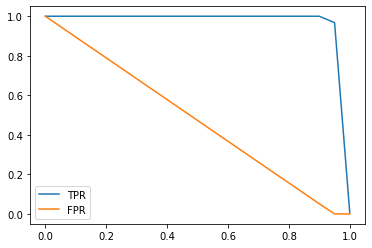

In [34]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

In [42]:
((y_ideal_pred > 0.87) == y_ideal).mean()

0.9217002237136466

<h3>Training the model with full dataset</h3>

Best Result with Xgboost, then train the model with the full dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [2]:
def dataset_loading(file):
    df = pd.read_csv(file)
    return df


def dataset_cleaning(df):
    df = df.drop(['job_id'], axis = 'columns')
    
    df['title_lenght'] = (np.where(df['title'].isnull(), 0, df['title'].str.len())).astype('int64')
    df['location_available'] = np.where(df['location'].isnull(), 'not_available', 'available')
    df['department_available'] = np.where(df['department'].isnull(), 'not_available', 'available')
    df['salary_range_available'] = np.where(df['salary_range'].isnull(), 'not_available', 'available')
    df['company_profile_available'] = np.where(df['company_profile'].isnull(), 'not_available', 'available')
    df['company_profile_lenght'] = (np.where(df['company_profile'].isnull(), 0, df['company_profile'].str.len())).astype('int64')
    df['description_available'] = np.where(df['description'].isnull(), 'not_available', 'available')
    df['description_lenght'] = (np.where(df['description'].isnull(), 0, df['description'].str.len())).astype('int64')
    df['requirements_available'] = np.where(df['requirements'].isnull(), 'not_available', 'available')
    df['requirements_lenght'] = (np.where(df['requirements'].isnull(), 0, df['requirements'].str.len())).astype('int64')
    df['benefits_available'] = np.where(df['benefits'].isnull(), 'not_available', 'available')
    df['benefits_lenght'] = (np.where(df['benefits'].isnull(), 0, df['benefits'].str.len())).astype('int64')
    df = df.drop(['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits'], axis = 'columns')

    df.fillna("not_available",inplace=True)

    cols = list(df.dtypes[df.dtypes == 'object'].index)
    for c in cols:
        df[c] = df[c].str.lower().str.replace(' ', '_')
    
    return df


def confusionMap(y_val):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    t = 0.5
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    confusion_matrix = np.array([
        [tn, fp], 
        [fn, tp]
    ])

    print((confusion_matrix / confusion_matrix.sum()).round(2))


def Precision_Recall(y_val):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    t = 0.5
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    p = tp / (tp + fp)
    print('Precision: %.3f' % p)

    r = tp / (tp + fn)
    print('Recall: %.3f' % r)

In [3]:
df = dataset_loading('fake_job_postings.csv')

df = dataset_cleaning(df)

numerical = ['telecommuting', 'has_company_logo', 'has_questions', 'company_profile_lenght', 'description_lenght',
            'requirements_lenght', 'benefits_lenght', 'title_lenght']
categorical = ['location_available', 'department_available', 'salary_range_available', 'company_profile_available',
               'description_available', 'requirements_available', 'benefits_available', 'employment_type',
               'required_experience', 'required_education', 'industry', 'function']         
target = ['fraudulent']

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
df_train = df_train.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fraudulent.values
y_full_train = df_full_train.fraudulent.values
y_val = df_val.fraudulent.values
y_test = df_test.fraudulent.values

del df_train['fraudulent']
del df_val['fraudulent']
del df_full_train['fraudulent']
del df_test['fraudulent']

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
full_train_dicts = df_full_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
test_dicts = df_test[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_full_train = dv.transform(full_train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [6]:
features = dv.get_feature_names()

In [7]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [8]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,
                  dfulltrain,
                  num_boost_round=175)

In [9]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.9834742349408865

In [10]:
confusionMap(y_test)

[[0.95 0.  ]
 [0.01 0.04]]


In [11]:
Precision_Recall(y_test)

Precision: 0.938
Recall: 0.746


<h3>Exporting model to file</h3>

In [26]:
import pickle

In [27]:
output_file = f'model.bin'

In [28]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv,model), f_out)

print(f'The Model is saved to {output_file}')

The Model is saved to model.bin
